In [2]:
import os
import glob
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# make it interactive
%matplotlib notebook

#matplotlib.use('Qt5Agg')

#%matplotlib ipympl
#%matplotlib qt5
#%matplotlib nbagg
#%matplotlib widget

# pip install PyQt5
# pip install ipympl

### Load a desired picture and heatmaps

In [3]:
#image = './data/gradcam_1kplus0003_dwi.nii.gz'
# path to the image to be analyzed
impath = './data/images/1kplus0003_dwi.nii.gz'
# path to the directory with heatmaps
hmpath = './data/heatmaps'

# load the mage
image = nib.load(impath).get_fdata()
# convert to uint 255 and normalize
image = (image * 255).astype("uint8")


# get heatmap paths for the image being investigated
# each heatmap with match with the image by '*[image_name]'
imname = os.path.basename(impath)
hmpaths = glob.glob(os.path.join(hmpath, '*' + imname))
# load heatmaps
heatmaps = [nib.load(hmpath).get_fdata() for hmpath in hmpaths]


### Preprocess overlaying

In [4]:
# define overlay parameters
color_map = 'jet'
image_weight = 0.5

subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (4, 4),
                 'subplot_kw': {'xticks': [], 'yticks': []} }

titles = ['GradCAM']

In [81]:
print(imname)
print(image.shape)
print(image.dtype)
print('min:', image.min())
print('max:', image.max())
print(hmpaths)

1kplus0003_dwi.nii.gz
(192, 192, 50)
float64
min: 0.0
max: 979.0
['./data/heatmaps/gradcam_1kplus0003_dwi.nii.gz']


In [6]:
heatmaps[0] = heatmaps[0].T

### Define interactive plot fucntionality

In [79]:
def multi_slice_viewer(image, heatmap):
    remove_keymap_conflicts({'j', 'k'})
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
    
    print('num axes:', len(fig.axes))
    print('images:', len(ax.images))
    
    ax.image = image
    ax.index = image.shape[0] // 2
    im = ax.imshow(image[ax.index], cmap="gray")
    
    print('type images[0]:', type(ax.images[0]))
    print('type im:', type(im))
    print('ax.images[0].axes:', im.axes)
    
    ax.set_title(titles[0], fontsize=10)
    ax.heatmap = heatmap
    ax.imshow(heatmap[ax.index], cmap='jet', alpha=0.5)
    
    print('heatmap shape:', heatmap.shape)
    print('images:', len(ax.images))
    
    #plt.tight_layout()
    fig.canvas.mpl_connect('key_press_event', process_key)
 

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]

    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw_idle()


def previous_slice(ax):
    volume = ax.image
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])
    
    volume = ax.heatmap
    ax.images[1].set_array(volume[ax.index])

 
def next_slice(ax):
    volume = ax.image
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])
    
    volume = ax.heatmap
    ax.images[1].set_array(volume[ax.index])
   
   
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith("keymap."):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)
                

### Define interactive plot fucntionality

<IPython.core.display.Javascript object>


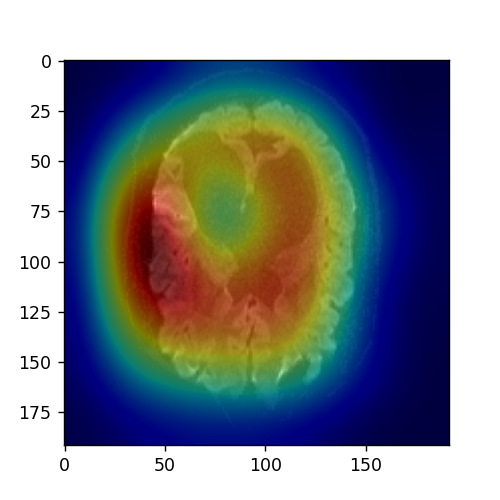

num axes: 1
images: 0
type images[0]: <class 'matplotlib.image.AxesImage'>
type im: <class 'matplotlib.image.AxesImage'>
ax.images[0].axes: AxesSubplot(0.125,0.11;0.775x0.77)
heatmap shape: (50, 192, 192, 4)
images: 2


In [80]:
multi_slice_viewer(image.T, heatmaps[0])  # that should be the image you loaded